## Udacity Set to Coco

In [1]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
print(sys.path)

['', '/home/dean/anaconda3/envs/ros-kache/lib/python35.zip', '/home/dean/anaconda3/envs/ros-kache/lib/python3.5', '/home/dean/anaconda3/envs/ros-kache/lib/python3.5/plat-linux', '/home/dean/anaconda3/envs/ros-kache/lib/python3.5/lib-dynload', '/home/dean/.local/lib/python3.5/site-packages', '/home/dean/anaconda3/envs/ros-kache/lib/python3.5/site-packages', '/home/dean/anaconda3/envs/ros-kache/lib/python3.5/site-packages/IPython/extensions', '/home/dean/.ipython']


In [2]:
## Imports

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from PIL import Image

import scipy.misc
from skimage import measure   

import time
import os
import zipfile as zf
import tarfile
import csv
import pickle
import urllib
import pandas as pd

/home/dean/anaconda3/envs/ros-kache/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline
import os
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [49]:
coco_directory = '/media/dean/49D9D6EB1BE53FC4/datasets/darknet/data/coco/'

image_directory = os.path.join(coco_directory, 'images','train2014')
annotation_file = os.path.join(coco_directory, 'annotations', 'instances_train2014.json')

In [26]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=8.65s)
creating index...
index created!


In [38]:
category_ids = example_coco.getCatIds()
cats = {}
for catid in category_ids:
    cats[catid] = example_coco.loadCats(catid)

# categories = example_coco.loadCats(example_coco.getCatIds())
# category_names = [category['name'] for category in categories]
# print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))



supercategory_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(supercategory_names)))

print(cats)
print(len(cats))

Custom COCO supercategories: 
vehicle animal accessory outdoor appliance sports food indoor furniture electronic person kitchen
{1: [{'supercategory': 'person', 'id': 1, 'name': 'person'}], 2: [{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}], 3: [{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}], 4: [{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}], 5: [{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}], 6: [{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}], 7: [{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}], 8: [{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}], 9: [{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}], 10: [{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}], 11: [{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}], 13: [{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}], 14: [{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}], 15: [{'supercategory': 'outdoor', 'id'

In [77]:
category_ids = example_coco.getCatIds(catNms=['car','truck'])
cartruck_image_ids = example_coco.getImgIds(catIds=category_ids)


print(len(cartruck_image_ids))



category_ids = example_coco.getCatIds(catNms=['truck'])
truck_image_ids = example_coco.getImgIds(catIds=category_ids)
truck_image_ids =  set(truck_image_ids) - set(cartruck_image_ids)
print(len(truck_image_ids))


category_ids = example_coco.getCatIds(catNms=['car'])
car_image_ids = example_coco.getImgIds(catIds=category_ids)
car_image_ids =  set(car_image_ids) - set(cartruck_image_ids)


print(len(car_image_ids))


2588
1733
6018


In [79]:
import csv

with open('coco_cars_trucks.csv', mode='w') as coco_file:
    coco_writer = csv.writer(coco_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    coco_writer.writerow(['ID', 'FileName', 'ImageUrl'])
    
    for img_info in truckcar_image_data:
        truckcar_image_data = example_coco.loadImgs(cartruck_image_ids)
        coco_writer.writerow([img_info['id'], img_info['file_name'], img_info['flickr_url']])
        
    coco_writer.writerow([' ', ' ', ' '])
    coco_writer.writerow([' ', ' ', ' '])

with open('coco_trucks.csv', mode='w') as coco_file:
    coco_writer = csv.writer(coco_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    coco_writer.writerow(['ID', 'FileName', 'ImageUrl'])
    
    for img_info in truck_image_data:
        truck_image_data = example_coco.loadImgs(truck_image_ids)
        coco_writer.writerow([img_info['id'], img_info['file_name'], img_info['flickr_url']])
        
    coco_writer.writerow([' ', ' ', ' '])
    coco_writer.writerow([' ', ' ', ' '])
        

with open('coco_cars.csv', mode='w') as coco_file:
    coco_writer = csv.writer(coco_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    coco_writer.writerow(['ID', 'FileName', 'ImageUrl'])
    
    for img_info in car_image_data:
        car_image_data = example_coco.loadImgs(car_image_ids)
        coco_writer.writerow([img_info['id'], img_info['file_name'], img_info['flickr_url']])

TypeError: list indices must be integers or slices, not str

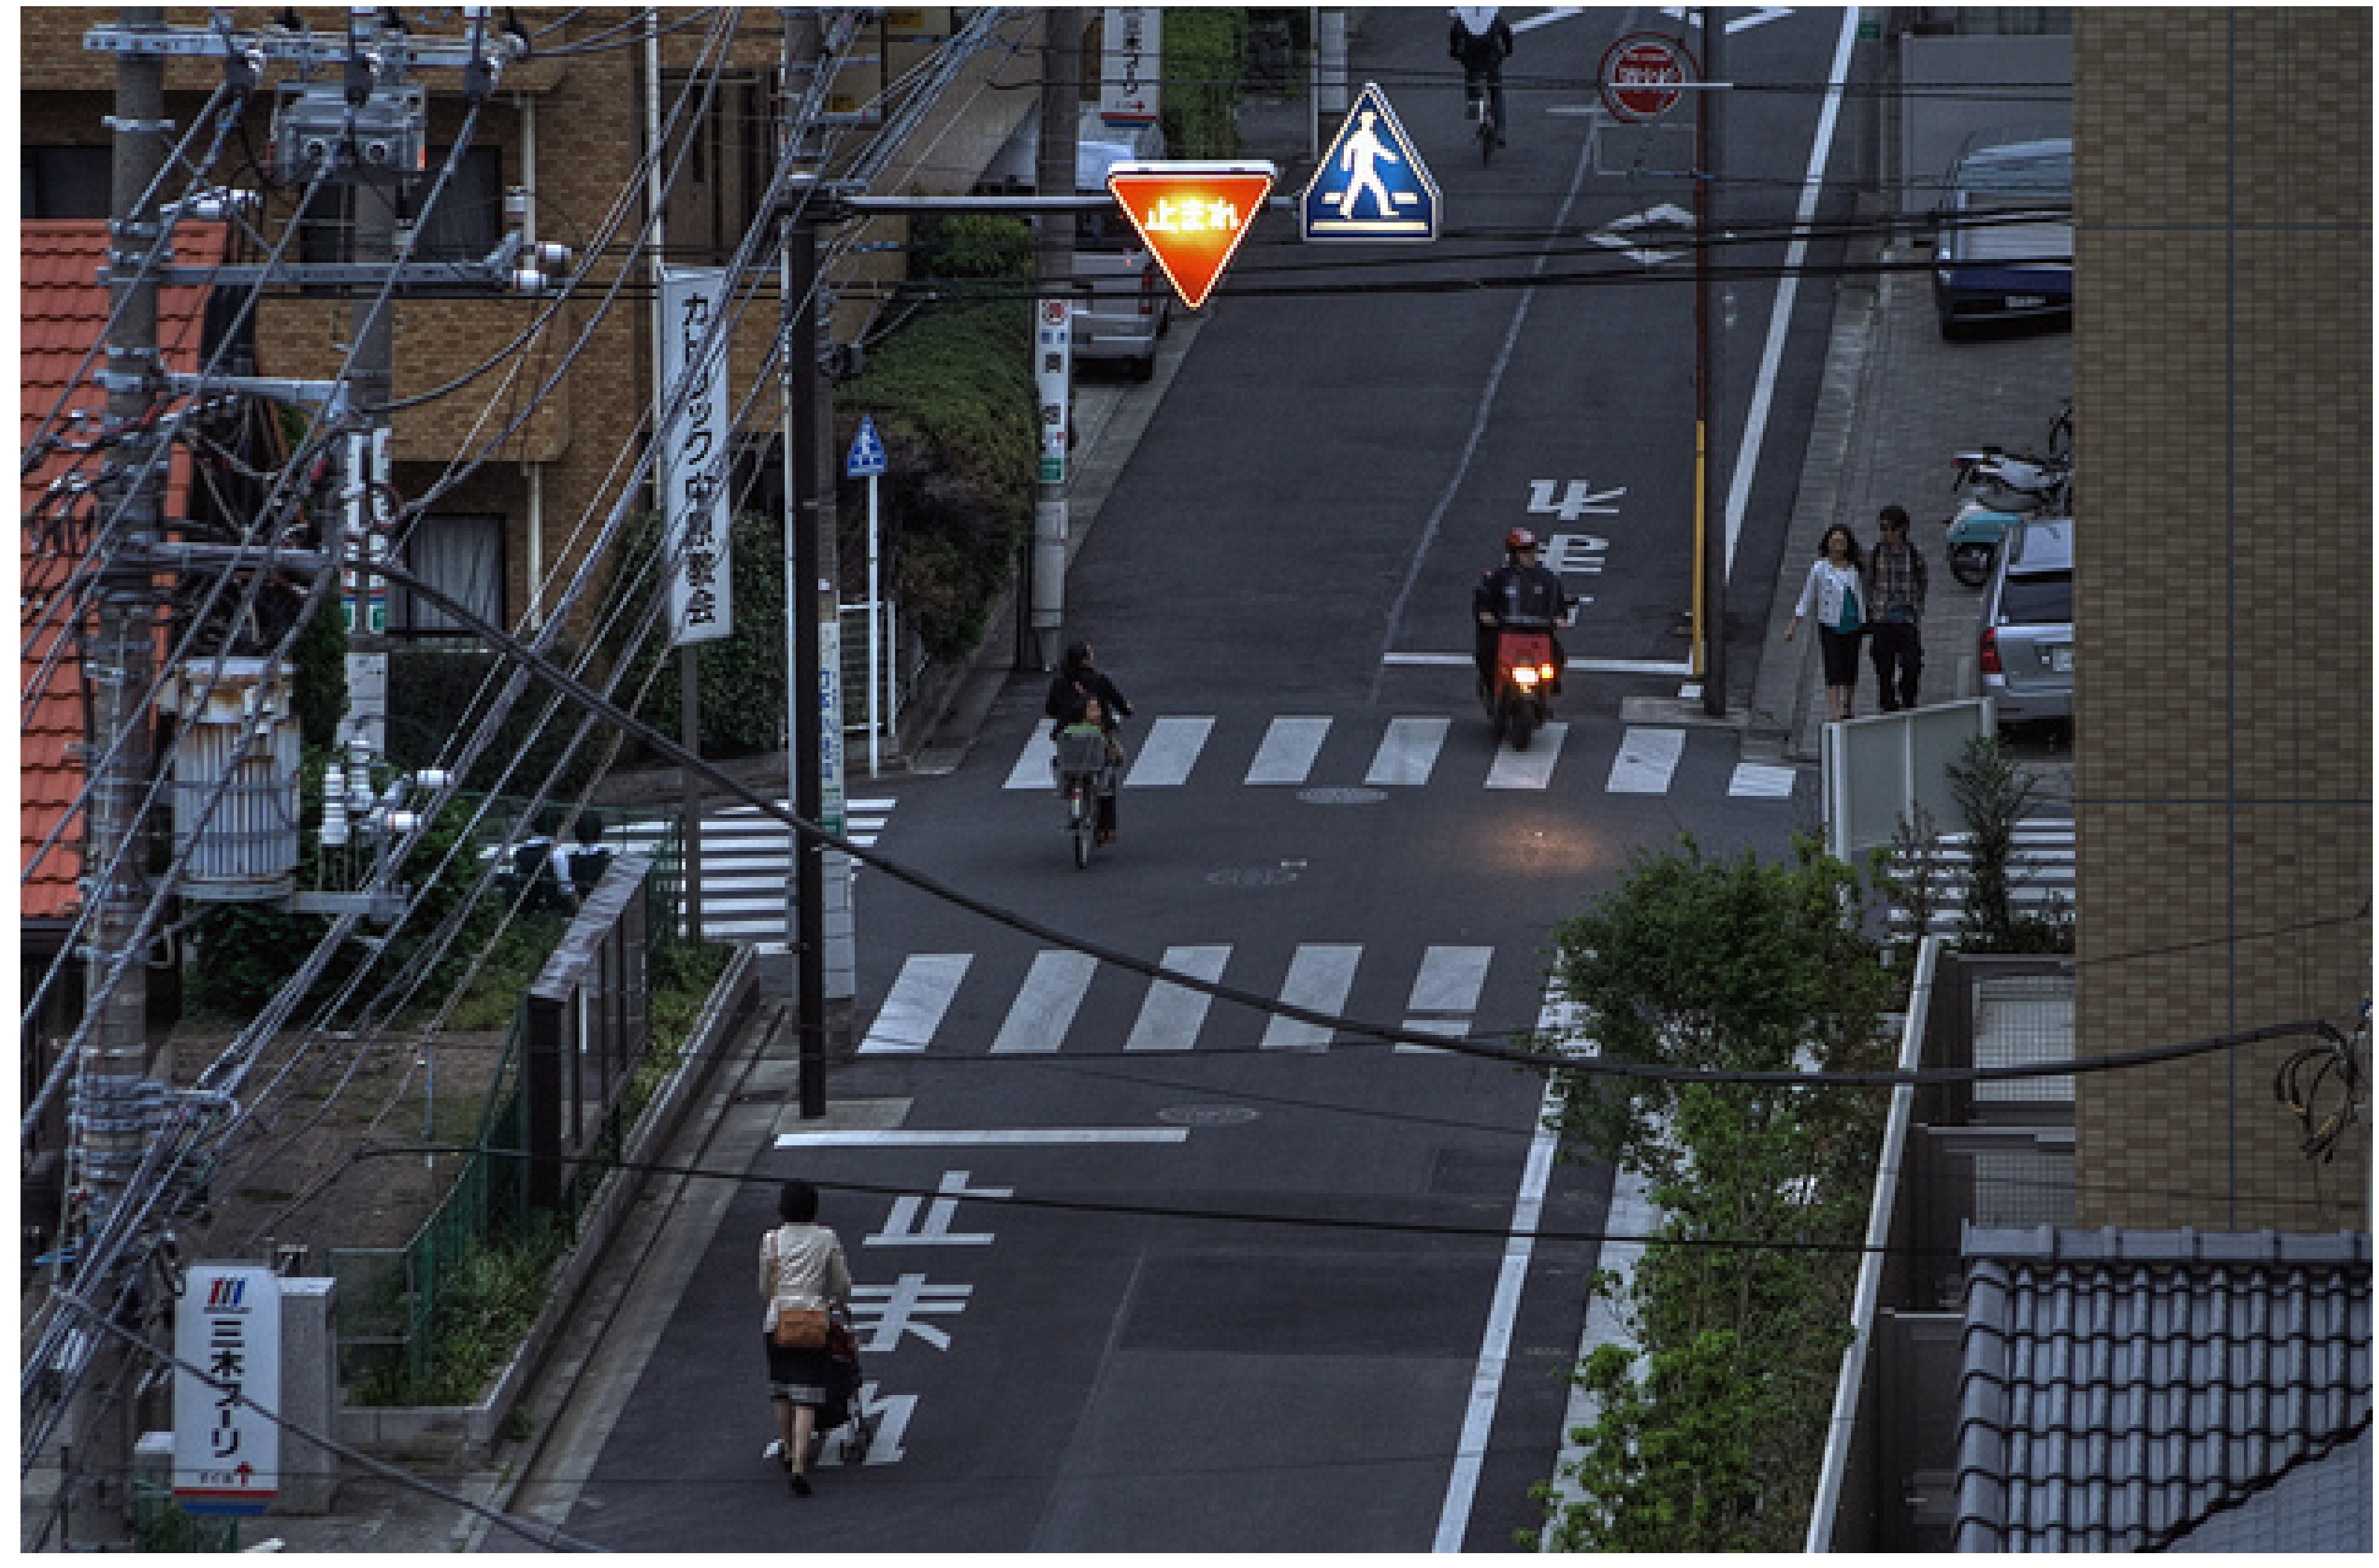

In [63]:
# load and display instance annotations
image = io.imread(os.path.join(image_directory ,image_data[0]['file_name']))
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (68.0, 120.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)